In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset

df = pd.read_csv('data/houseprice.csv')

df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(7120, 108)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Columns: 108 entries, bath to location_Tumkur Road
dtypes: float64(5), int64(103)
memory usage: 5.9 MB


In [5]:
df.columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=108)

In [6]:
#seperating features and target
X = df.drop('price', axis=1)
y = df['price']

In [7]:
#splitting dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
#training model
from sklearn.tree import DecisionTreeRegressor

dct = DecisionTreeRegressor()
dct.fit(X_train, y_train)

DecisionTreeRegressor()

In [28]:
dct.get_depth()

22

In [9]:
#model evaluation
y_pred = dct.predict(X_test)

In [10]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9227936812841927

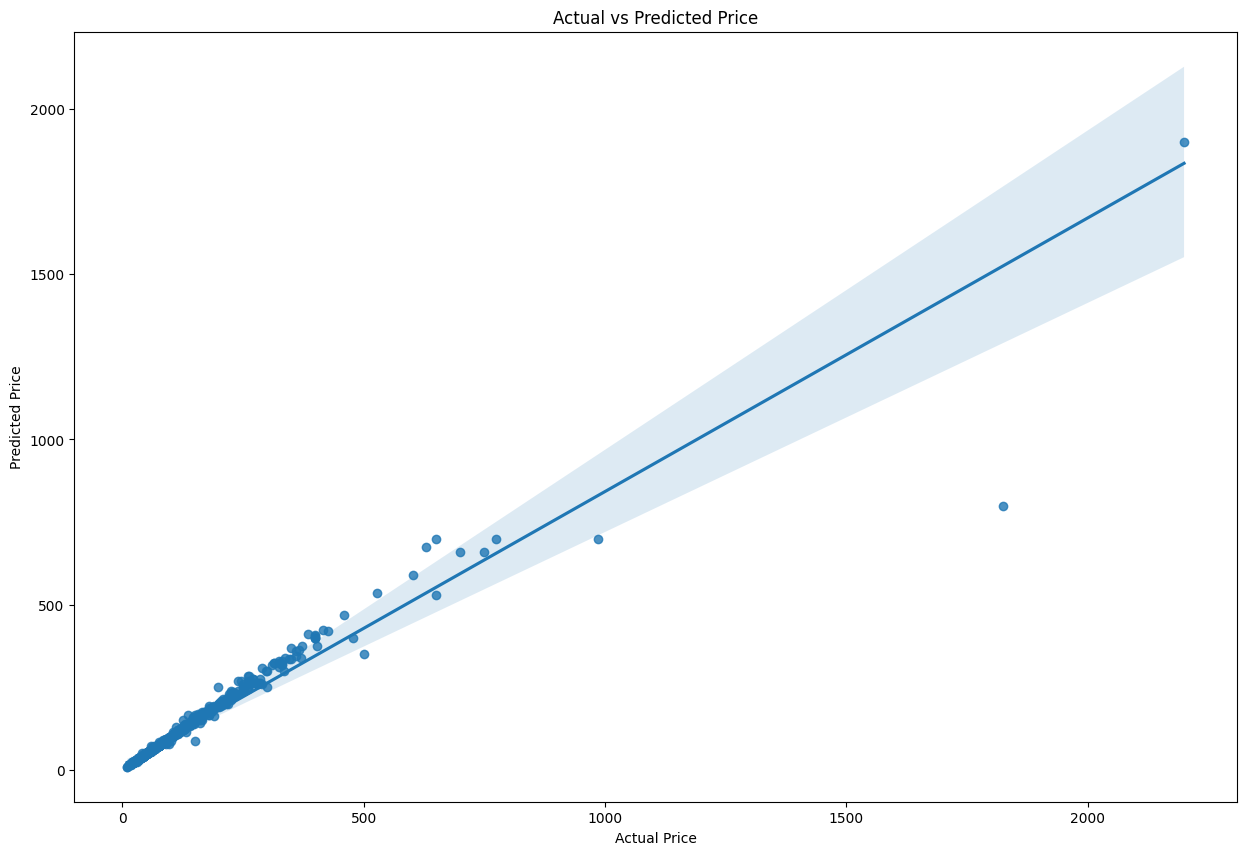

In [14]:
#plotting predicted values vs actual values

plt.figure(figsize=(15,10))
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel('Predicted Price')
plt.title("Actual vs Predicted Price")
plt.show()

In [26]:
#visualizing decision tree with max_depth = 3
regressor = DecisionTreeRegressor(max_depth=3, random_state=1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

r2_score(y_test, y_pred)

0.7624851719489383

[Text(0.5, 0.875, 'total_sqft_int <= 7650.0\nsquared_error = 13878.746\nsamples = 5696\nvalue = 96.633'),
 Text(0.25, 0.625, 'total_sqft_int <= 2170.83\nsquared_error = 7397.876\nsamples = 5684\nvalue = 93.33'),
 Text(0.125, 0.375, 'price_per_sqft <= 6182.782\nsquared_error = 1471.337\nsamples = 5091\nvalue = 72.906'),
 Text(0.0625, 0.125, 'squared_error = 403.435\nsamples = 3676\nvalue = 57.239'),
 Text(0.1875, 0.125, 'squared_error = 1951.287\nsamples = 1415\nvalue = 113.608'),
 Text(0.375, 0.375, 'price_per_sqft <= 10889.328\nsquared_error = 23954.086\nsamples = 593\nvalue = 268.667'),
 Text(0.3125, 0.125, 'squared_error = 6248.397\nsamples = 449\nvalue = 208.907'),
 Text(0.4375, 0.125, 'squared_error = 33306.153\nsamples = 144\nvalue = 455.0'),
 Text(0.75, 0.625, 'price_per_sqft <= 6937.5\nsquared_error = 629933.743\nsamples = 12\nvalue = 1661.417'),
 Text(0.625, 0.375, 'bath <= 4.5\nsquared_error = 11250.0\nsamples = 4\nvalue = 650.0'),
 Text(0.5625, 0.125, 'squared_error = 2500.0

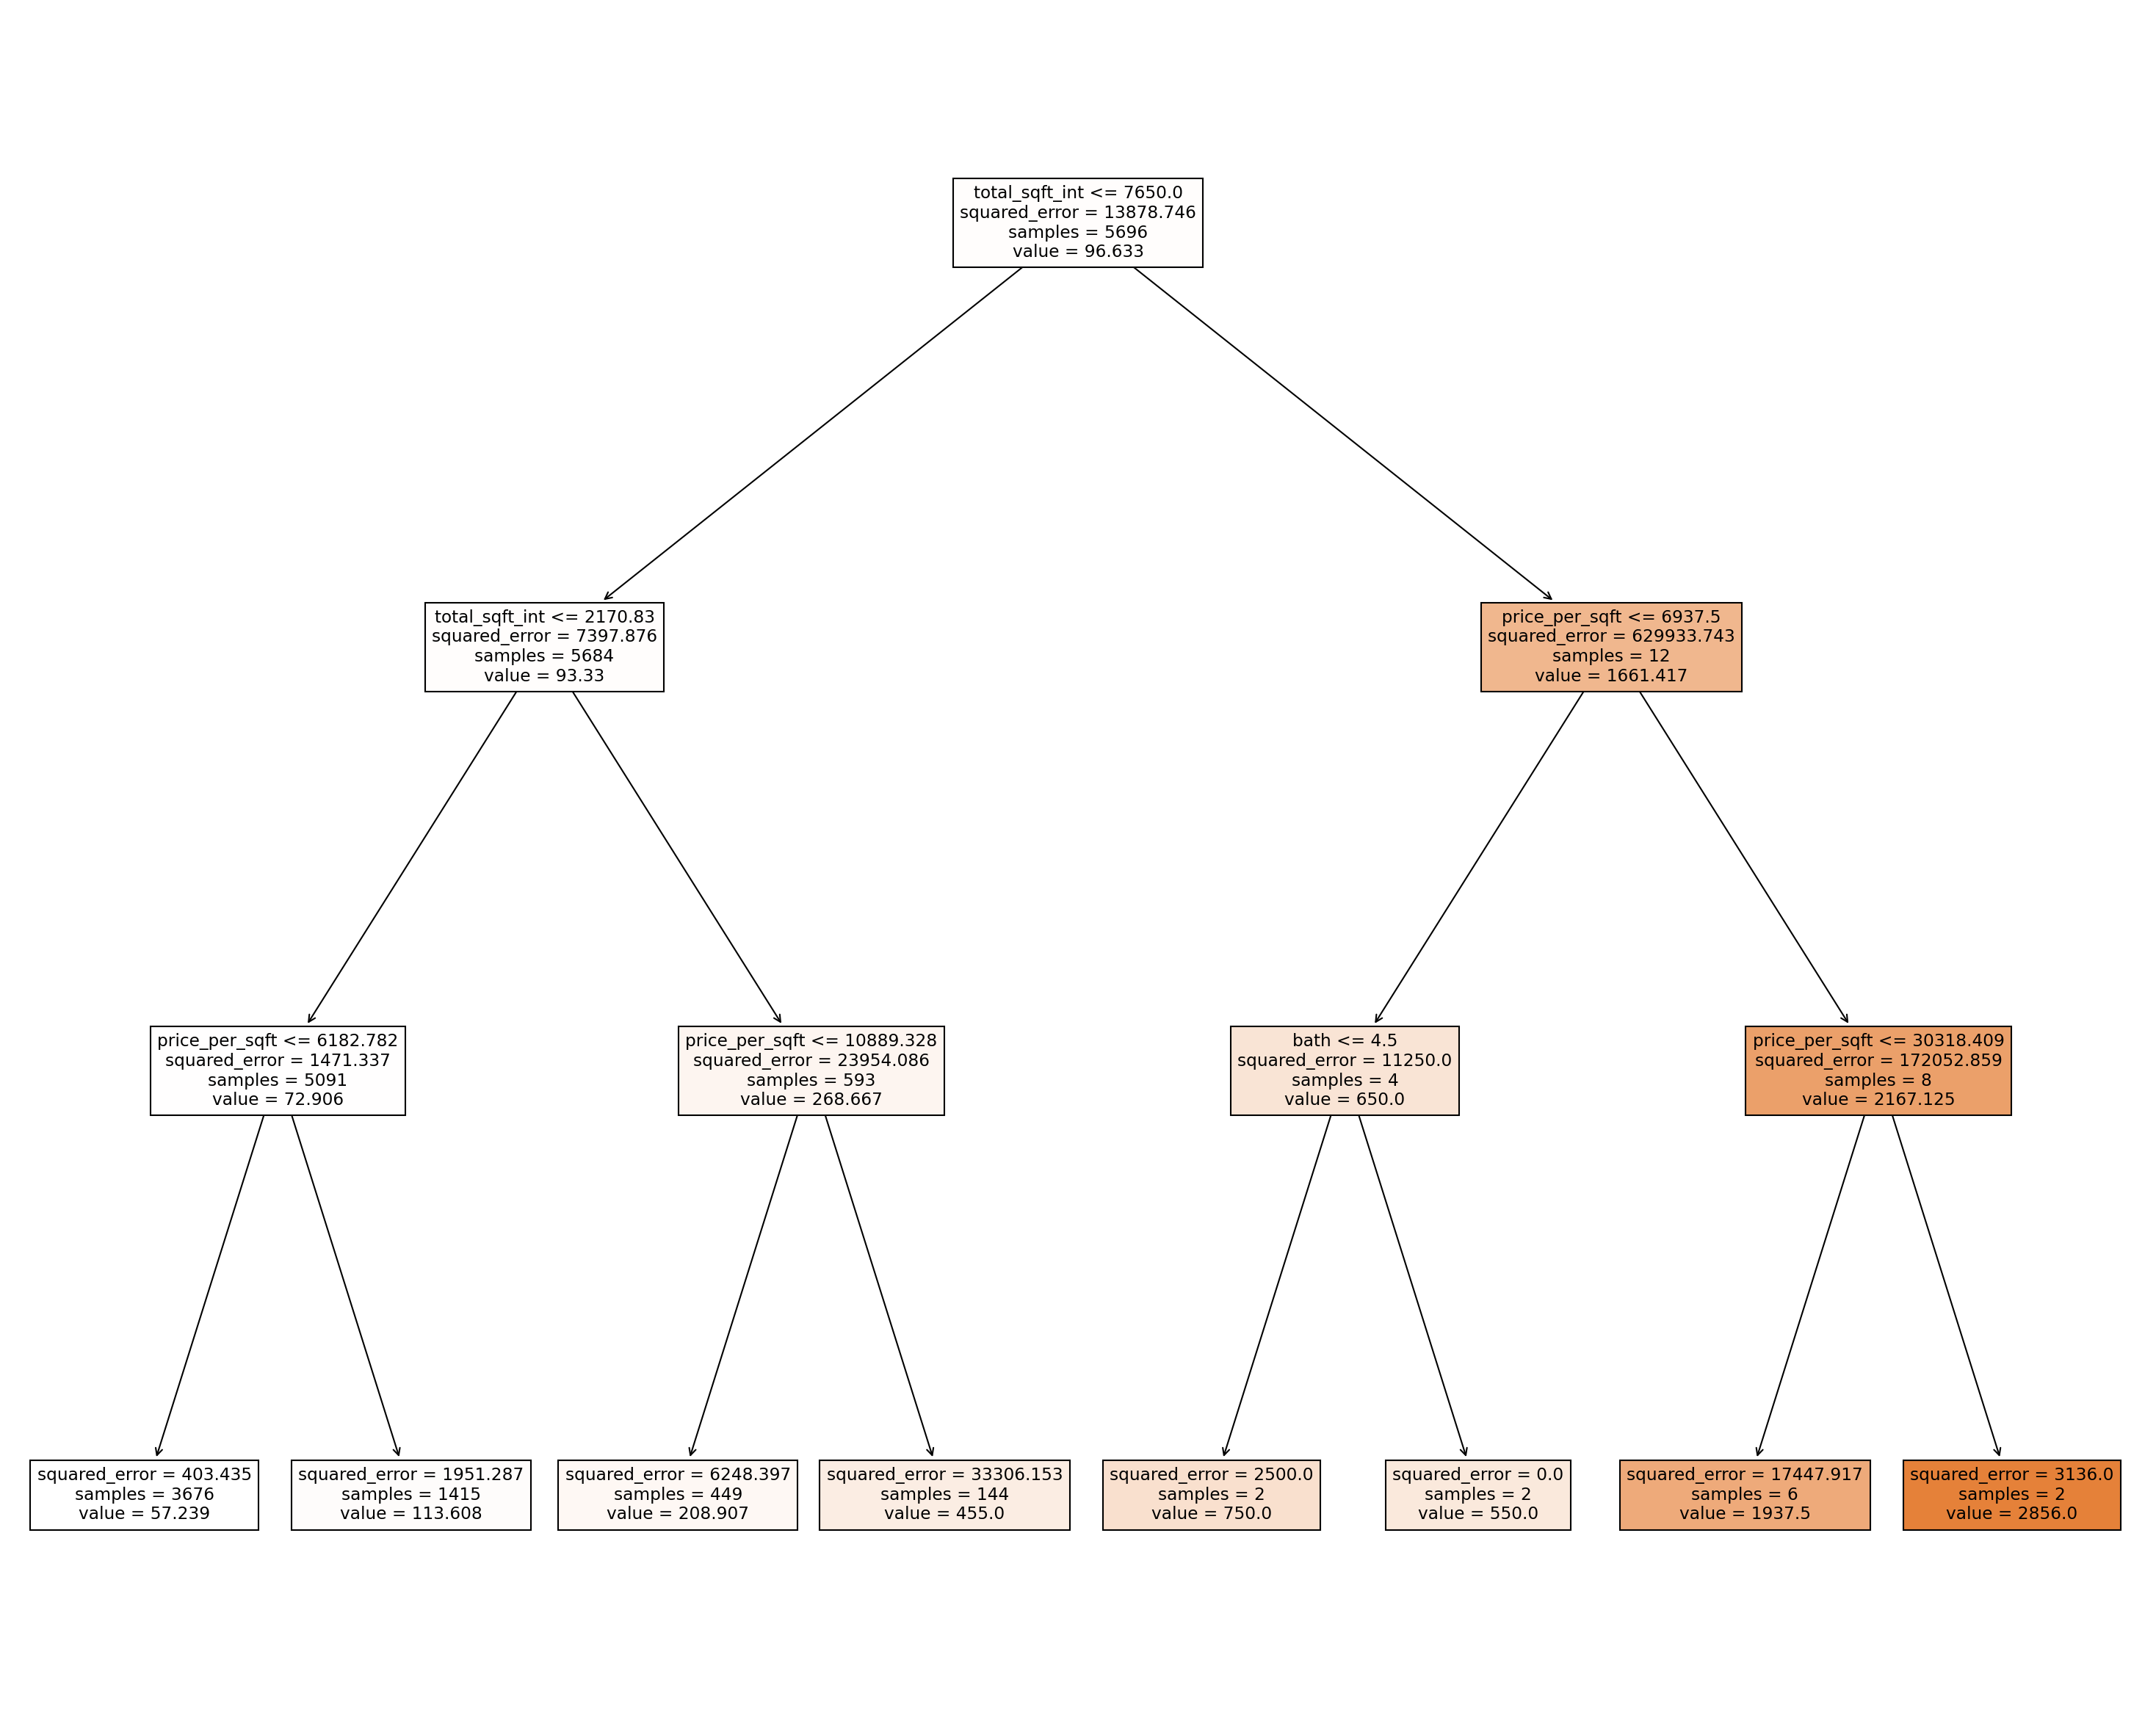

In [27]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,20), dpi=150)
plot_tree(regressor, feature_names=X_train.columns, filled=True)